# Статистика по датасету

In [1]:
from ipymarkup import show_dep_ascii_markup as show_markup
from razdel import sentenize, tokenize
from navec import Navec
from slovnet import Syntax
import pandas as pd
from tqdm.notebook import tqdm
from string import punctuation
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from razdel import tokenize

pd.options.mode.chained_assignment = None

Код для синтаксического парсинга.

In [2]:
# navec = Navec.load('navec_news_v1_1B_250K_300d_100q.tar') 
# syntax = Syntax.load('slovnet_syntax_news_v1.tar')
# syntax.navec(navec)

# chunk = []
# for sent in sentences:
#     tokens = [_.text for _ in tokenize(sent)]
#     chunk.append(tokens)

# def parsing(markup):    
#     words, deps = [], []
#     for token in markup.tokens:
#         words.append(token.text)
#         source = int(token.head_id) - 1
#         target = int(token.id) - 1
#         if source > 0 and source != target:
#             deps.append([source, target, token.rel]) 
#     return words, deps 

# new = []
# id_pair = 0
# for i, s in tqdm(enumerate(sentences)):
#     markup = next(syntax.map([chunk[i]]))
#     words, deps = parsing(markup)
#     for d in deps:
#         head = words[d[0]].lower()
#         dep = words[d[1]].lower()
#         type_net = d[2]
#         if type_net != 'punct':
#             dict_pair = {'id_pair': id_pair, 
#                          'id_sent': i,
#                          'head': head,
#                          'dep': dep,
#                          'type': type_net,
#                          'sent': s}
#             new.append(dict_pair)
#             id_pair += 1

## Финальный датасет

In [18]:
dataset = pd.read_csv('final_noncomp_dataset.tsv', sep='\t', index_col=0)

In [19]:
dataset

,id_sent,head,dep,SCORE,type,sent,Title,Author,Created,Sphere,Type,Topic,Publication,Publ_year,Medium
0,0,молод,музей,1.0,nsubj,Музей деревянного зодчества молод-- ему всего ...,"Музей-ларец // «Народное творчество», 2004",NaN,2004,нехудожественная | публицистика,статья,искусство и культура,«Народное творчество»,2004,журнал
1,0,зодчества,деревянного,0.0,amod,Музей деревянного зодчества молод-- ему всего ...,"Музей-ларец // «Народное творчество», 2004",NaN,2004,нехудожественная | публицистика,статья,искусство и культура,«Народное творчество»,2004,журнал
3,0,семь,всего,1.0,advmod,Музей деревянного зодчества молод-- ему всего ...,"Музей-ларец // «Народное творчество», 2004",NaN,2004,нехудожественная | публицистика,статья,искусство и культура,«Народное творчество»,2004,журнал
4,0,лет,семь,0.0,nummod:gov,Музей деревянного зодчества молод-- ему всего ...,"Музей-ларец // «Народное творчество», 2004",NaN,2004,нехудожественная | публицистика,статья,искусство и культура,«Народное творчество»,2004,журнал
6,0,сложилась,но,0.0,cc,Музей деревянного зодчества молод-- ему всего ...,"Музей-ларец // «Народное творчество», 2004",NaN,2004,нехудожественная | публицистика,статья,искусство и культура,«Народное творчество»,2004,журнал
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,298,рок-группе,и,0.0,cc,"О некоторых недостатках моего характера, Федо...",Запись LiveJournal (2004),NaN,2004,нехудожественная | электронная коммуникация,блог,частная жизнь,NaN,2004,электронный текст
1989,298,рок-группе,рыцари,0.0,appos,"О некоторых недостатках моего характера, Федо...",Запись LiveJournal (2004),NaN,2004,нехудожественная | электронная коммуникация,блог,частная жизнь,NaN,2004,электронный текст
1990,298,яблок,диких,2.0,amod,"О некоторых недостатках моего характера, Федо...",Запись LiveJournal (2004),NaN,2004,нехудожественная | электронная коммуникация,блог,частная жизнь,NaN,2004,электронный текст
1991,298,рыцари,яблок,2.0,nmod,"О некоторых недостатках моего характера, Федо...",Запись LiveJournal (2004),NaN,2004,нехудожественная | электронная коммуникация,блог,частная жизнь,NaN,2004,электронный текст


## Графики

### По предложениям

In [20]:
dataset_sourses = dataset.drop_duplicates(['sent'])

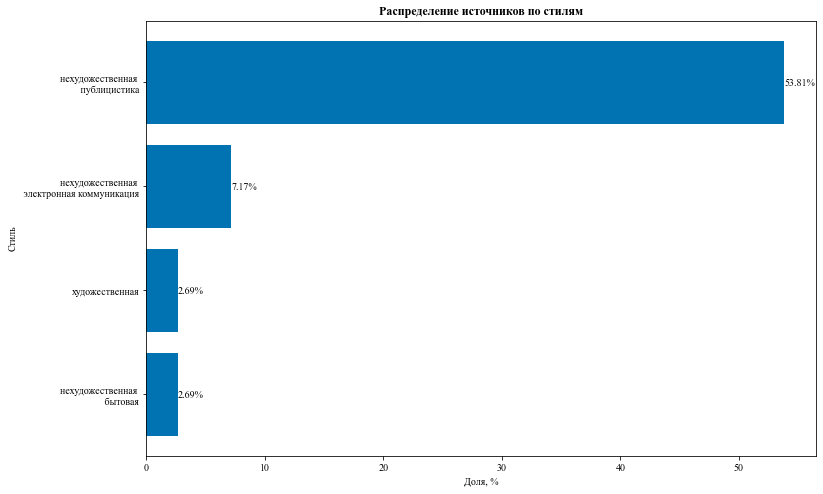

In [21]:
pers = [n / dataset_sourses.shape[0] * 100 for n in dataset_sourses.groupby(['Sphere']).count().sent.to_list()]
bars = ['\n'.join(name.split('|')) for name in dataset_sourses.groupby(['Sphere']).count().index.to_list()]
new = list(zip(pers, bars))
new = sorted(new)
pers = [elem[0] for elem in new]
bars = [elem[1] for elem in new]
pers_for_p = [str(round(p, 2)) + '%' for p in pers]

y_pos = np.arange(len(bars))

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(12, 8))
p = plt.barh(y_pos, pers)
plt.yticks(y_pos, bars)
plt.bar_label(p, pers_for_p)
plt.title('Распределение источников по стилям',fontweight='bold')
plt.xlabel('Доля, %')
plt.ylabel('Стиль')
plt.savefig('sphere_distribution.png', bbox_inches='tight')

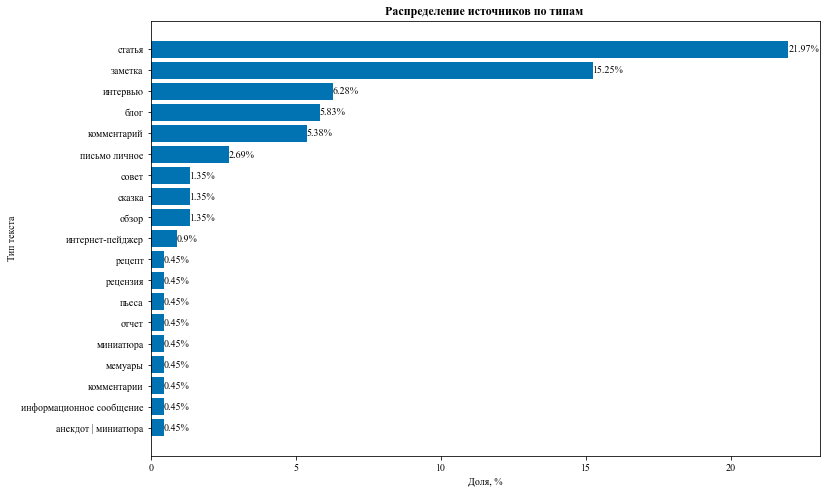

In [22]:
pers = [n / dataset_sourses.shape[0] * 100 for n in dataset_sourses.groupby(['Type']).count().sent.to_list()]
bars = dataset_sourses.groupby(['Type']).count().index.to_list()
new = list(zip(pers, bars))
new = sorted(new)
pers = [elem[0] for elem in new]
bars = [elem[1] for elem in new]
pers_for_p = [str(round(p, 2)) + '%' for p in pers]

y_pos = np.arange(len(bars))

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(12, 8))
p = plt.barh(y_pos, pers)
plt.yticks(y_pos, bars)
plt.bar_label(p, pers_for_p)
plt.title('Распределение источников по типам ',fontweight='bold')
plt.xlabel('Доля, %')
plt.ylabel('Тип текста')
plt.savefig('type_distribution', bbox_inches='tight')

/Users/romankazakov/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


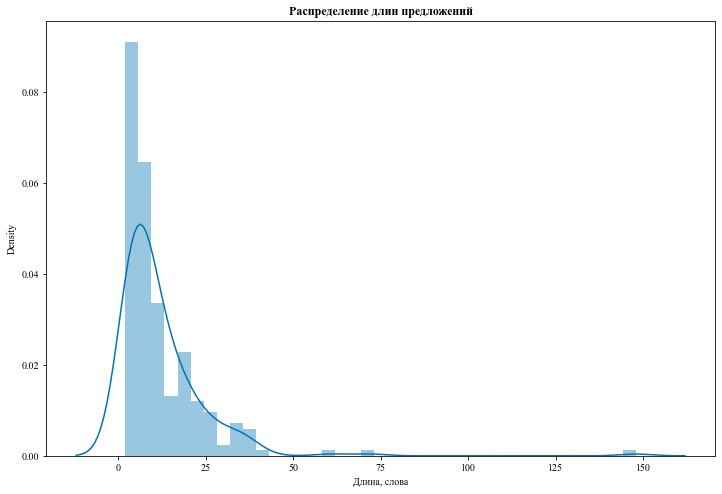

In [23]:
dataset_sourses['tokens_length'] = dataset_sourses['sent'].apply(lambda s: len(list(tokenize(s))))

sns.set_palette('colorblind')
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(12, 8))
ax = sns.distplot(dataset_sourses['tokens_length'])
plt.title('Распределение длин предложений', fontweight='bold')
plt.xlabel('Длина, слова')
plt.savefig('lengths_distribution.png', bbox_inches='tight')

### По выражениям

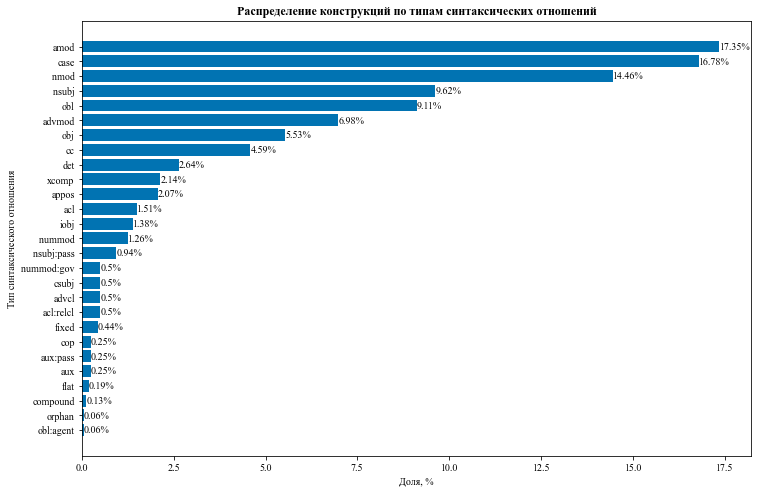

In [24]:
pers = [n / dataset.shape[0] * 100 for n in dataset.groupby(['type']).count().sent.to_list()]
bars = dataset.groupby(['type']).count().index.to_list()
new = list(zip(pers, bars))
new = sorted(new)
pers = [elem[0] for elem in new]
bars = [elem[1] for elem in new]
pers_for_p = [str(round(p, 2)) + '%' for p in pers]

y_pos = np.arange(len(bars))

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(12, 8))
p = plt.barh(y_pos, pers)
plt.yticks(y_pos, bars)
plt.bar_label(p, pers_for_p)
plt.title('Распределение конструкций по типам синтаксических отношений', fontweight='bold')
plt.xlabel('Доля, %')
plt.ylabel('Тип синтаксического отношения')
plt.savefig('synt_types_distribution.png', bbox_inches='tight')

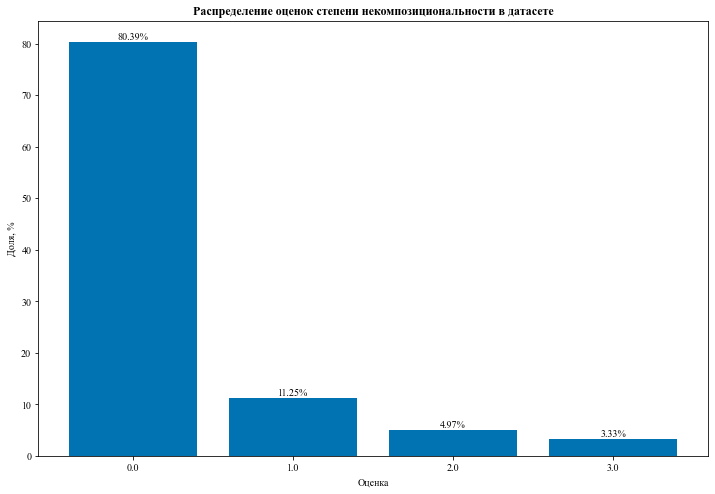

In [25]:
pers = [n / dataset.shape[0] * 100 for n in dataset.groupby(['SCORE']).count().sent.to_list()]
bars = dataset.groupby(['SCORE']).count().index.to_list()
new = list(zip(pers, bars))
new = sorted(new)
new.reverse()
pers = [elem[0] for elem in new]
bars = [elem[1] for elem in new]
pers_for_p = [str(round(p, 2)) + '%' for p in pers]

y_pos = np.arange(len(bars))

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(12, 8))
p = plt.bar(y_pos, pers)
plt.xticks(y_pos, bars)
plt.bar_label(p, pers_for_p)
plt.title('Распределение оценок степени некомпозициональности в датасете',fontweight='bold')
plt.xlabel('Оценка')
plt.ylabel('Доля, %')
plt.savefig('marks_bars.png', bbox_inches='tight')

/Users/romankazakov/.local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


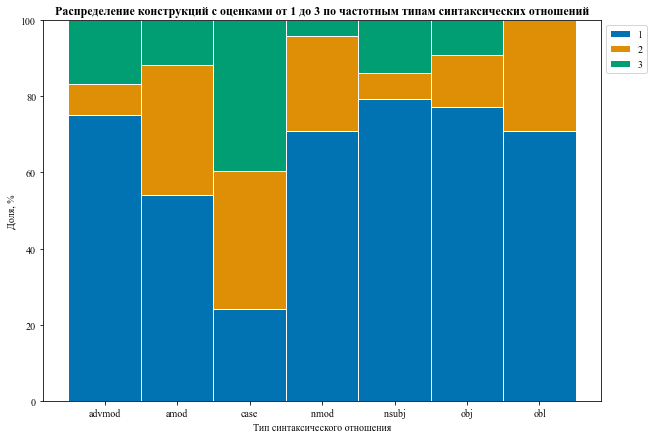

In [26]:
without_zero = dataset[dataset['SCORE'] != '0']
without_zero = without_zero[(without_zero['type'] == 'amod') | 
                            (without_zero['type'] == 'case') |
                            (without_zero['type'] == 'nmod') |
                            (without_zero['type'] == 'nsubj') |
                            (without_zero['type'] == 'obl') |
                            (without_zero['type'] == 'advmod') |
                            (without_zero['type'] == 'obj')]
plot_dict = without_zero.groupby(['type','SCORE']).count().id_sent.to_dict()

main_dict = {}
synt_types = []
for i in range(1, 4):
    for type_, mark in plot_dict:
        if i == int(mark):
            if i not in main_dict:
                main_dict[i] = []
            if type_ not in synt_types:
                synt_types.append(type_)
            main_dict[i].append(plot_dict[(type_, mark)])
main_dict[3].append(0)

r = [0,1,2,3,4,5,6]
raw_data = main_dict
df = pd.DataFrame(raw_data)
 
totals = [i+j+k for i,j,k in zip(df[1], df[2], df[3])]
greenBars = [i / j * 100 for i,j in zip(df[1], totals)]
orangeBars = [i / j * 100 for i,j in zip(df[2], totals)]
blueBars = [i / j * 100 for i,j in zip(df[3], totals)]
 
barWidth = 1
names = synt_types
plt.figure(figsize=(10, 7))
plt.bar(r, greenBars, edgecolor='white', width=barWidth)
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth)
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth)
 
plt.xticks(r, names)
plt.xlabel("Тип синтаксического отношения")
plt.ylabel("Доля, %")
plt.title('Распределение конструкций с оценками от 1 до 3 по частотным типам синтаксических отношений',
          fontweight='bold')

plt.legend([1,2,3], loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.savefig('synt_1_3.png', bbox_inches='tight')

## Каппа Коэна

Мера согласия между **двумя** асессорами.

In [27]:
kappa_data = pd.read_csv('kappa_cohen.tsv', sep='\t', index_col=0).dropna()
kappa_data = kappa_data[(kappa_data['SCORE'] != '-') | (kappa_data['SCORE_KSENIA'] != '-')]
kappa_data

,id_sent,head,dep,SCORE,SCORE_KSENIA,type,sent
0,0,молод,музей,1,1,nsubj,Музей деревянного зодчества молод-- ему всего ...
1,0,зодчества,деревянного,0,0,amod,Музей деревянного зодчества молод-- ему всего ...
3,0,семь,всего,1,0,advmod,Музей деревянного зодчества молод-- ему всего ...
4,0,лет,семь,0,0,nummod:gov,Музей деревянного зодчества молод-- ему всего ...
6,0,сложилась,но,0,0,cc,Музей деревянного зодчества молод-- ему всего ...
...,...,...,...,...,...,...,...
1984,298,недостатках,характера,0,0,nmod,"О некоторых недостатках моего характера, Федо..."
1989,298,рок-группе,рыцари,0,0,appos,"О некоторых недостатках моего характера, Федо..."
1990,298,яблок,диких,2,0,amod,"О некоторых недостатках моего характера, Федо..."
1991,298,рыцари,яблок,2,0,nmod,"О некоторых недостатках моего характера, Федо..."


In [28]:
def cohen_kappa(ann1, ann2):
    """Computes Cohen kappa for pair-wise annotators.

    :param ann1: annotations provided by first annotator
    :type ann1: list
    :param ann2: annotations provided by second annotator
    :type ann2: list

    :rtype: float
    :return: Cohen kappa statistic
    """
    count = 0
    for an1, an2 in zip(ann1, ann2):
        if an1 == an2:
            count += 1
    A = count / len(ann1)  # observed agreement A (Po)

    uniq = set(ann1 + ann2)
    E = 0  # expected agreement E (Pe)
    for item in uniq:
        cnt1 = ann1.count(item)
        cnt2 = ann2.count(item)
        count = ((cnt1 / len(ann1)) * (cnt2 / len(ann2)))
        E += count

    return round((A - E) / (1 - E), 4)

In [30]:
kappa = cohen_kappa(kappa_data['SCORE'].to_list(), kappa_data['SCORE_KSENIA'].to_list())
print(f'каппа Коэна: {round(kappa, 2)}')

каппа Коэна: 0.55
